<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/Machine_Learning_and_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Machine Learning Fundamentals

---
1.	Model Training:

  a) Load Titanic dataset  and split it into training and testing sets (80-20 ratio).

  b) Train a logistic regression and a decision tree classifier on the dataset.

  c) Evaluate both models using accuracy and discuss which model performs better.

2.	Precision, Recall, and F1 Score:
  
  a) Using the trained models from Question 1, calculate and compare their precision, recall, and F1-score.

  b) Explain a scenario where high precision is preferred over recall and vice versa.

  c) Create a confusion matrix and interpret its results.

3.	Bias-Variance Tradeoff, Overfitting, and Underfitting:

  a) Train a polynomial regression model with different degrees (1, 3, and 5) on Boston Housing datsset.

  b) Plot the training and validation errors for each model and identify underfitting and overfitting cases.

  c) Explain the tradeoff between model complexity, bias, and variance.

---





**EDA**



In [ ]:
pip install kaggle

In [ ]:
! kaggle datasets download yasserh/titanic-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
! unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Titanic-Dataset.csv     


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df.groupby(['Pclass', 'Sex', 'Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,2
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.dropna(subset=['Age'])

In [ ]:
print(df.isnull().sum())
print(df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
(889, 12)


In [ ]:
df[['Fare','Age']].describe()

,Fare,Age
count,889.000000,889.000000
mean,32.096681,29.080900
std,49.697504,13.330126
min,0.000000,0.420000
25%,7.895800,21.000000
50%,14.454200,27.000000
75%,31.000000,36.000000
max,512.329200,80.000000


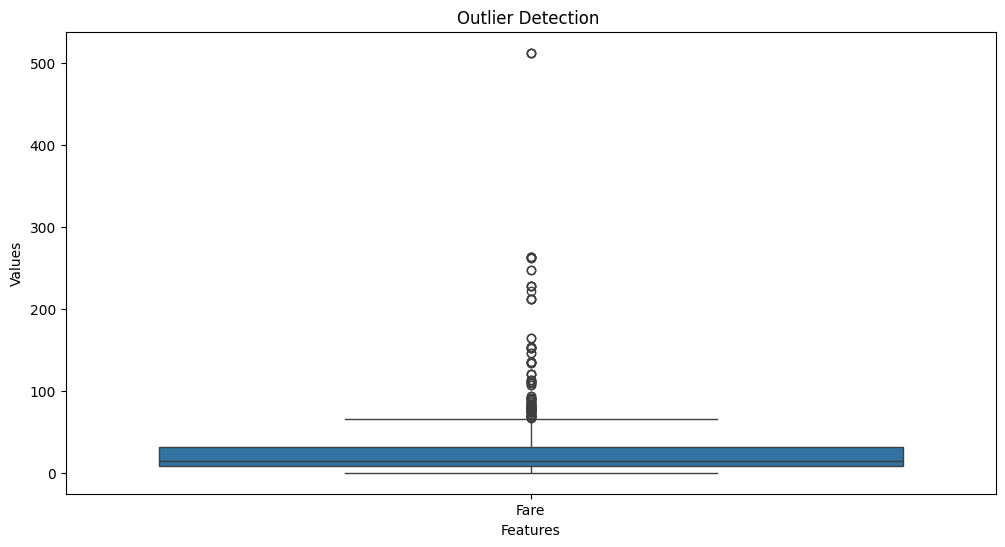

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Fare']])
plt.title('Outlier Detection ')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

# the outlier values
print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers[['Fare']])

Number of outliers detected: 114
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[114 rows x 1 columns]


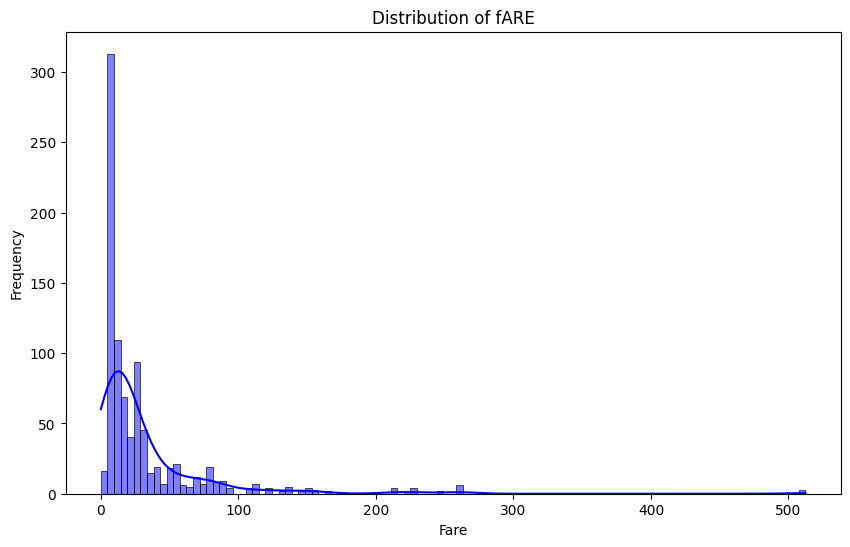

In [ ]:
#Plotting histogram to check charges(Skewness Found)
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, color='blue')
plt.title('Distribution of fARE')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Fare'].skew()

4.801440211044194

In [ ]:
df['Fare']=np.log1p(df['Fare'])

In [ ]:
df['Fare'].skew()

0.40010918935230094

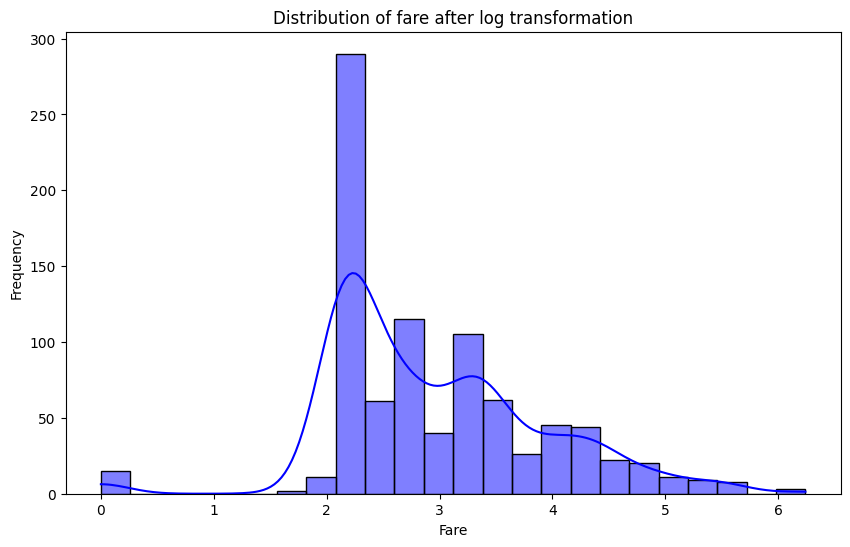

In [ ]:
#Plotting histogram to check charges
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, color='blue')
plt.title('Distribution of fare after log transformation')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
x = df[['Pclass', 'Sex', 'Age', 'Fare']]
x = pd.get_dummies(x, drop_first=True)  # One-hot encoding for categorical data
y = df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Logistic regression model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_log=log_reg.predict(x_test)

In [ ]:
# Decision tree classifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred_tree = dec_tree.predict(x_test)

**Model Evaluation**

In [ ]:
# Accuracy calculations
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Logistic Regression Accuracy: {acc_log}")
print(f"Decision Tree Accuracy: {acc_tree}")

Logistic Regression Accuracy: 0.8089887640449438
Decision Tree Accuracy: 0.8033707865168539


*Accuracy:*

      *  Logistic Regression Accuracy: 80.90%
      *  Decision Tree Accuracy: 80.34%


1. The Logistic Regression model performs marginally better compared to Decision Tree.

2. As the diffence in accuracy is very small they will perform comparatively similar.





In [ ]:
# Precision, Recall, and F1 Score
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Logistic Regression scores
print("Logistic Regression - Precision:", precision_log)
print("Logistic Regression - Recall:", recall_log)
print("Logistic Regression - F1 Score:", f1_log)
print()
# Decision Tree scores
print("Decision Tree - Precision:", precision_tree)
print("Decision Tree - Recall:", recall_tree)
print("Decision Tree - F1 Score:", f1_tree)

Logistic Regression - Precision: 0.7397260273972602
Logistic Regression - Recall: 0.782608695652174
Logistic Regression - F1 Score: 0.7605633802816901

Decision Tree - Precision: 0.7428571428571429
Decision Tree - Recall: 0.7536231884057971
Decision Tree - F1 Score: 0.7482014388489209




---



*   *Precision:* out of all the positive predictions (i.e.,people predicted to survive), approximately % were actually correct.

*   *Recall:* out of all the actual survivors (i.e., people who actually survived), the model correctly identified % of them.his suggests that the model is good at catching most of the survivors but is less accurate when predicting non-survivors

*  *F1-Score:* F1-score is the harmonic mean of precision and recall, and high score indicates that there is a decent balance between precision and recall for logistic regression.








Q. Where Precision Is Preferred Over Recall:

ans: In case of disease prediction model, precision might be preferred over recall. If a model predicts a disease when it isn't present (false positives), it could lead to unnecessary treatments, tests, and patient anxiety. So, we want to be sure that when we say someone has the disease, it is correct (high precision).

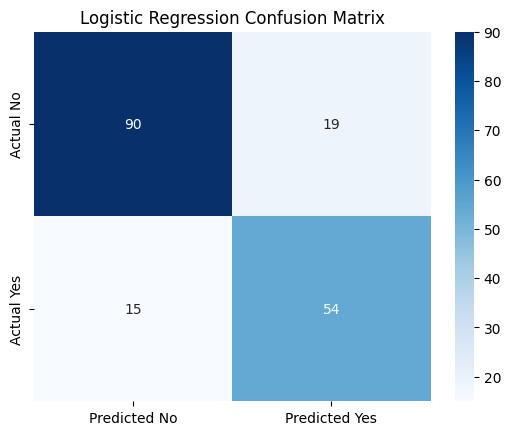

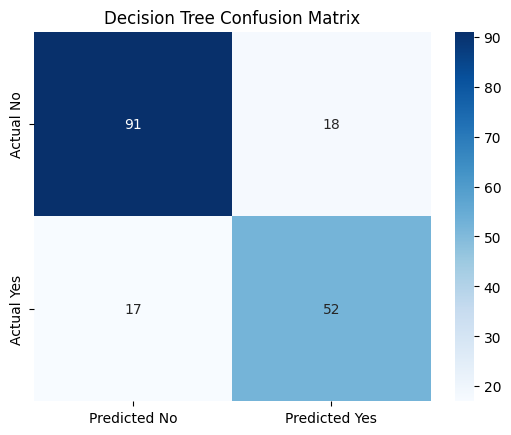

In [ ]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# axis labels
xticklabels = ["Predicted No", "Predicted Yes"]
yticklabels = ["Actual No", "Actual Yes"]

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=yticklabels)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree Confusion Matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=yticklabels)
plt.title("Decision Tree Confusion Matrix")
plt.show()


*Logistic Regression Model:*

True Negatives: 90 (correctly predicted non-survivors)

False Positives: 19 (incorrectly predicted survivors)

False Negatives: 15 (incorrectly predicted non-survivors)

True Positives: 54 (correctly predicted survivors)


*Decision Tree Model:*

True Negatives: 91 (correctly predicted non-survivors)

False Positives: 18 (incorrectly predicted survivors)

False Negatives: 17 (incorrectly predicted non-survivors)

True Positives: 52 (correctly predicted survivors)





---



---





In [ ]:
! kaggle datasets download arunjangir245/boston-housing-dataset

Dataset URL: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
License(s): DbCL-1.0
boston-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip boston-housing-dataset.zip

Archive:  boston-housing-dataset.zip
replace BostonHousing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BostonHousing.csv       


**EDA**

In [ ]:
df=pd.read_csv("BostonHousing.csv")

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
df.shape

(506, 14)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
x=df.drop('medv',axis=1)
y=df['medv']

In [ ]:
ss = StandardScaler()
x = ss.fit_transform(x)

**Model Training**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Train polynomial regression models
def train_poly_reg(degree):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    train_error = mean_squared_error(y_train, model.predict(x_train_poly))
    test_error = mean_squared_error(y_test, model.predict(x_test_poly))
    return train_error, test_error

In [ ]:
train_errors = []
test_errors = []
for degree in [1, 3, 5]:
    train_err, test_err = train_poly_reg(degree)
    train_errors.append(train_err)
    test_errors.append(test_err)


**Bias-Variance tradeoff**

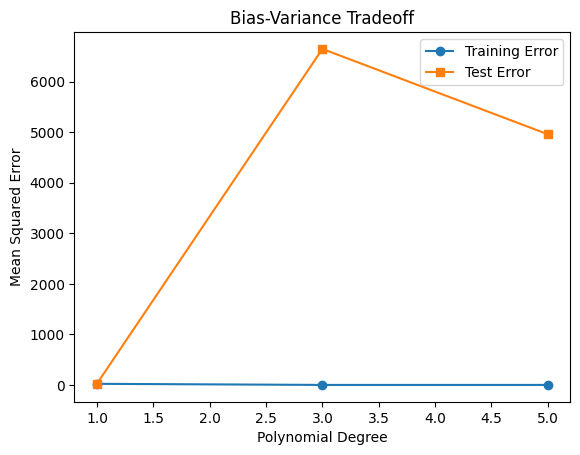

In [ ]:
# Plot errors
plt.plot([1, 3, 5], train_errors, label='Training Error', marker='o')
plt.plot([1, 3, 5], test_errors, label='Test Error', marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Bias-Variance Tradeoff")
plt.show()



*   The training error stays very low throughout, barely changing as degree increases. This suggests the model is able to fit the training data well regardless of polynomial degree.

*   For Degree 1, model might underfit but generalizes okay. But for degree 3 and 5 , Model overfits, memorizing training data but performing poorly on test data.


*   Best case is degree 1 where both training and test errors are low.










---

# Part -2 : K-Nearest Neighbors (KNN)

4.	KNN Implementation:

    a) Implement the K-Nearest Neighbors (KNN) algorithm from scratch (without using scikit-learn).

    b) Test your implementation on the Iris dataset and compare results with scikit-learn’s KNN classifier.

    c) Discuss the effect of different values of k on model performance.

5.	Curse of Dimensionality:

    a) Generate synthetic datasets with increasing feature dimensions (e.g., 2D, 5D, 10D, 20D).

    b) Apply KNN and observe the effect of dimensionality on accuracy and distance calculations.

    c) Explain why the curse of dimensionality affects KNN performance and suggest ways to mitigate it



---



In [ ]:
import numpy as np
from collections import Counter

class KNN:
  def __init__(self,k=3):
    self.k=k

  def fit(self,X,y):
    self.X_train=X
    self.y_train=y

  def predict(self, X_test):
      predictions = []
      for x in X_test:
          distances = np.sqrt(np.sum((x - self.X_train) ** 2, axis=1))
          k_indices = np.argsort(distances)[:self.k]
          k_labels = self.y_train[k_indices]
          most_common = Counter(k_labels).most_common(1)
          predictions.append(most_common[0][0])
      return np.array(predictions)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)


In [ ]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
knn = KNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_scratch = accuracy_score(y_test, y_pred)
print(f"KNN accuracy: {accuracy_scratch}")

KNN accuracy: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Scikit-learn's KNN classifier
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Scikit-learn KNN accuracy: {accuracy_sklearn:.2f}")

Scikit-learn KNN accuracy: 1.00


In [ ]:
for k in [1, 3, 5, 7, 9, 25, 50, 85, 100]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred):}")


k=1, Accuracy=1.0
k=3, Accuracy=1.0
k=5, Accuracy=1.0
k=7, Accuracy=1.0
k=9, Accuracy=1.0
k=25, Accuracy=1.0
k=50, Accuracy=0.9333333333333333
k=85, Accuracy=0.6666666666666666
k=100, Accuracy=0.4


In [ ]:
for k in [1, 3, 5, 7, 9, 25, 50, 85, 100]:
  knn_sklearn = KNeighborsClassifier(n_neighbors=k)
  knn_sklearn.fit(X_train, y_train)
  y_pred_sklearn = knn_sklearn.predict(X_test)
  accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

  print(f"Scikit-learn KNN accuracy: {accuracy_sklearn:.2f}")

Scikit-learn KNN accuracy: 1.00
Scikit-learn KNN accuracy: 1.00
Scikit-learn KNN accuracy: 1.00
Scikit-learn KNN accuracy: 1.00
Scikit-learn KNN accuracy: 1.00
Scikit-learn KNN accuracy: 1.00
Scikit-learn KNN accuracy: 0.93
Scikit-learn KNN accuracy: 0.67
Scikit-learn KNN accuracy: 0.40


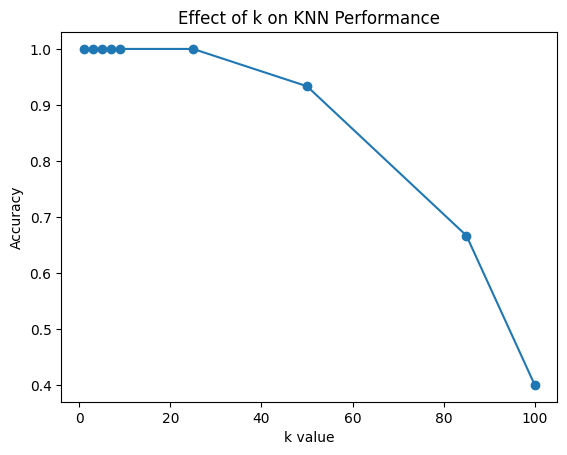

In [ ]:
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 9, 25, 50, 85, 100]
accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Effect of k on KNN Performance')
plt.show()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


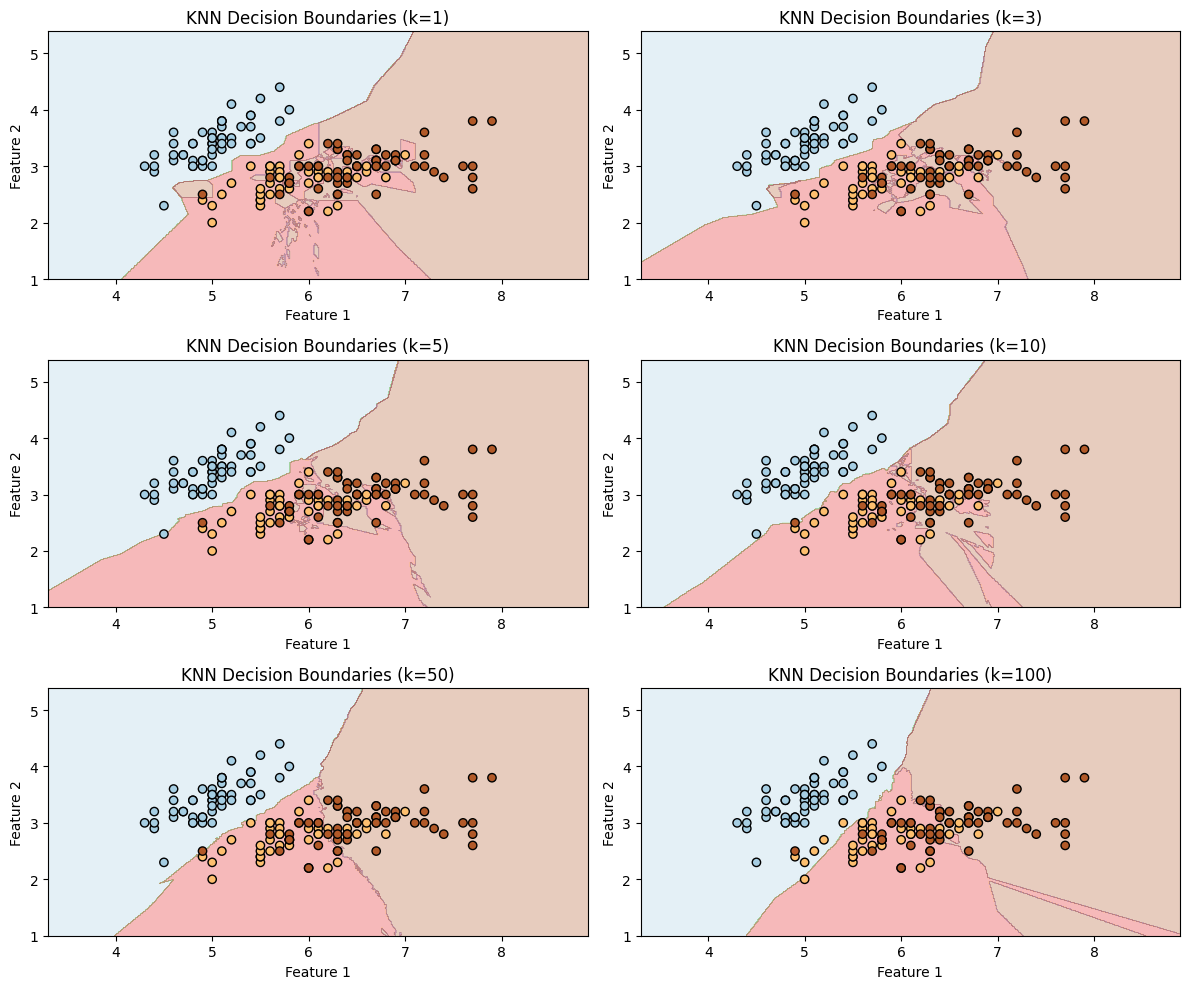

In [ ]:
import numpy as np
iris = datasets.load_iris()
print(iris.feature_names)
X, y = iris.data[:, :2], iris.target  # Using only the first two features for visualization

# Create mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot for different k values
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
k_values = [1, 3, 5, 10, 50, 100]

for ax, k in zip(axs.flat, k_values):
    # Use your custom KNN class instead of sklearn's KNeighborsClassifier
    knn = KNN(k=k)
    knn.fit(X, y)

    # Predict the class labels for the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',
               cmap=plt.cm.Paired, marker='o')
    ax.set_title(f'KNN Decision Boundaries (k={k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

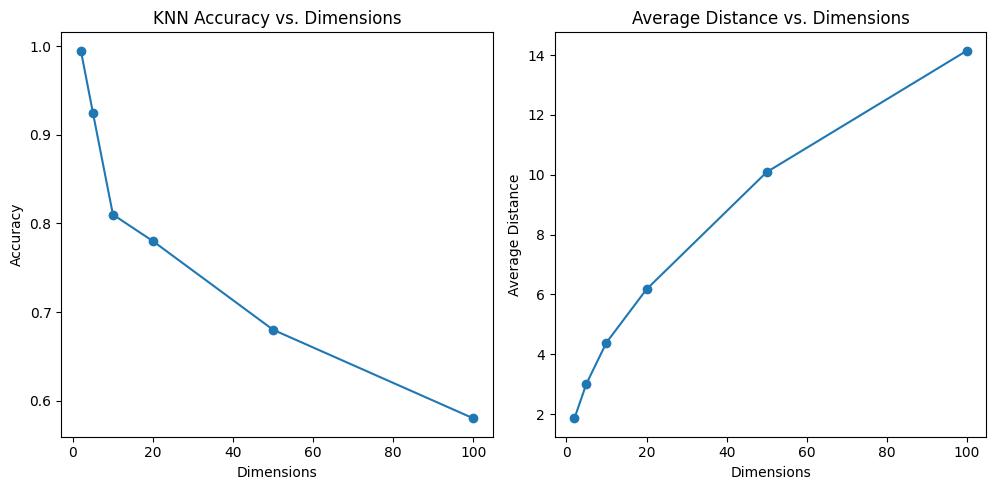

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def generate_synthetic_data(n_samples, n_features, n_classes=2):
    """Generate synthetic data with specified dimensions."""
    X = np.random.normal(0, 1, (n_samples, n_features))

    # Create class centers
    centers = np.random.normal(0, 1, (n_classes, n_features))

    # Assign classes based on nearest center
    y = np.zeros(n_samples)
    for i in range(n_samples):
        distances = np.linalg.norm(X[i] - centers, axis=1)
        y[i] = np.argmin(distances)

    return X, y

def dimensionality_effect(dimensions, n_samples=1000):
    """Analyze the effect of dimensionality on KNN performance."""
    results = {
        'dimensions': dimensions,
        'accuracies': [],
        'avg_distances': [],
    }

    for dim in dimensions:
        # Generate data
        X, y = generate_synthetic_data(n_samples, dim)

        # Split and scale data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train and evaluate KNN
        knn = KNN(k=3)
        knn.fit(X_train_scaled, y_train)
        accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))

        # Calculate average distances
        distances = []
        for i in range(min(100, len(X_test_scaled))):
            dist = np.linalg.norm(X_test_scaled[i] - X_train_scaled, axis=1)
            distances.extend(dist)

        avg_distance = np.mean(distances)

        results['accuracies'].append(accuracy)
        results['avg_distances'].append(avg_distance)


    return results

# Run analysis
dimensions = [2, 5, 10, 20, 50, 100]
results = dimensionality_effect(dimensions)

# Create visualization
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(dimensions, results['accuracies'], marker='o')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Dimensions')

# Plot average distances
plt.subplot(1, 3, 2)
plt.plot(dimensions, results['avg_distances'], marker='o')
plt.xlabel('Dimensions')
plt.ylabel('Average Distance')
plt.title('Average Distance vs. Dimensions')

plt.tight_layout()

*Why KNN Performance Degrades in High Dimensions:*

*   As dimensions increase, data points become sparse in the exponentially growing space, making it harder to find truly nearby neighbors.

*   Each additional dimension adds potential noise, and the effect of noise across many dimensions can overwhelm the meaningful patterns in the data.



*Approaches to Tackle this:*


*   Dimensionality Reduction

*   Feature Engineering

*   Standardize features to ensure equal scale



